# Naïve Bayes algorithm for classification

This notebooks includes 8 different models

1. Gaussian Naive Bayes for Binary Classification (class2)
2. Gaussian Naive Bayes for Binary Classification (class2) with kBest features
3. Gaussian Naive Bayes for Binary Classification (class2) with normalized features
4. Gaussian Naive Bayes for Binary Classification (class2) with normalized kBest features
5. Gaussian Naive Bayes for Multiclass Classification (class4)
6. Gaussian Naive Bayes for Multiclass Classification (class4) with kBest features
7. Gaussian Naive Bayes for Multiclass Classification (class4) with normalized features
8. Gaussian Naive Bayes for Multiclass Classification (class4) with normalized kBest features

After we have found best models for binary and multiclass prediction, we will make prediction for npf_test_hidden and to test set.

### Import needed libraries

In [681]:
#%reset
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix
import pandas as pd
from sklearn.naive_bayes import GaussianNB, ComplementNB, MultinomialNB, BernoulliNB, CategoricalNB
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import os
import seaborn as sns
from sklearn import preprocessing 
from sklearn.feature_selection import chi2, SelectKBest
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

### Define help function

In [682]:
def data_cleaner(df, hidden):
    data = df.copy()
    data.set_index(["id"],inplace=True)
    data.drop(["date","partlybad"],1,inplace=True)
    # If hidden="N", then create col class2
    if hidden=="N":
        # Set create col class2
        data["class2"] = np.where(data["class4"] == "nonevent", "nonevent","event")
        # Set coll2 to first place
        cols = ['class2'] + [col for col in data if col != 'class2']
        data = data[cols]
    # If hidden==Y, then drop empty col class4
    if hidden=="Y":
        data.drop(["class4"],1,inplace=True)
    return data

def normalize_0to1(df):
    scaler = MinMaxScaler()
    df_norm = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
    return df_norm

def find_n_best_feature(X, y, n):
    bestfeatures = SelectKBest(score_func=chi2, k=n)
    fit = bestfeatures.fit(X, y)
    dfscores = pd.DataFrame(fit.scores_)
    dfcolumns = pd.DataFrame(X.columns)
    featureScores = pd.concat([dfcolumns,dfscores],axis=1)
    featureScores.columns = ['col_name','Score']
    featureScores= featureScores.nlargest(n,'Score')
    cols = list(featureScores["col_name"])
    return cols

def split_data(df):
    # Define X and y
    X = df.drop(["class2","class4"], axis=1)
    y = df[["class2", "class4"]]
    # Split df to test 60%, val 20% and test 20%
    # Generate TrainVal 80% and test 20% 
    X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)
    # Furthermore split train into Train and Val
    X_train, X_val, y_train, y_val= train_test_split( X_trainval, y_trainval, test_size=0.25, random_state=42, stratify=y_trainval)
    return X_train, X_val, X_trainval, X_test, y_train, y_val, y_trainval, y_test

### Import data and print length and categorical distribution

In [683]:
# Define folder of the raw data
os.chdir('C:/Users/saukk/Desktop/ML_Project')

# Read data
npf_train = pd.read_csv("data/npf_train.csv")
npf_test_hidden = pd.read_csv("data/npf_test_hidden.csv")

# Clean npf_train and add cols class2 and class4
npf_train = data_cleaner(npf_train, "N")
npf_test_hidden = data_cleaner(npf_test_hidden, "Y")

# Create normalized npf_train and npf_test_hidden
scaler = StandardScaler()
scaler.fit(npf_train.iloc[:,2:])

npf_train_norm = npf_train.copy()
npf_train_norm.iloc[:,2:] = scaler.transform(npf_train_norm.iloc[:,2:])

npf_test_hidden_norm = npf_test_hidden.copy()
npf_test_hidden_norm.iloc[:,] = scaler.transform(npf_test_hidden_norm.iloc[:,])

# Split npf_train to train, val and test
X_train, X_val, X_trainval, X_test, y_train, y_val, y_trainval, y_test = split_data(npf_train)

# Create 0to1 normalized npf_trainval for bestK search
X_trainval_0to1 = normalize_0to1(X_trainval)

# Split npf_train_norm to train, val and test
X_train_norm, X_val_norm, X_trainval_norm, X_test_norm, y_train, y_val, y_trainval, y_test = split_data(npf_train_norm)

# Save all the file to folder cleaned_data
#npf_train.to_csv("cleaned_data/npf_train.csv", index=True)
#npf_test_hidden.to_csv("cleaned_data/npf_test_hidden.csv", index=True)

#npf_train_norm.to_csv("cleaned_data/npf_train_norm.csv", index=True)
#npf_test_hidden_norm.to_csv("cleaned_data/npf_test_hidden_norm.csv", index=True)

#X_trainval.to_csv("cleaned_data/X_trainval.csv", index=True)
#X_trainval_norm.to_csv("cleaned_data/X_trainval_norm.csv", index=True)
#y_trainval.to_csv("cleaned_data/y_trainval.csv", index=True)

#X_test.to_csv("cleaned_data/X_test.csv", index=True)
#X_test_norm.to_csv("cleaned_data/X_test_norm.csv", index=True)
#y_test.to_csv("cleaned_data/y_test.csv", index=True)

# Print sets distribution
names = ["Train set", "Test set", "Validation set", "Train+validation set"]
sets = [y_train, y_test, y_val, y_trainval]
for i in range(len(names)):
    df = sets[i]
    print(names[i])
    print("Len:",len(df))
    print(df["class4"].value_counts(normalize=True),"\n")

Train set
Len: 258
nonevent    0.500000
II          0.248062
Ib          0.189922
Ia          0.062016
Name: class4, dtype: float64 

Test set
Len: 86
nonevent    0.500000
II          0.244186
Ib          0.197674
Ia          0.058140
Name: class4, dtype: float64 

Validation set
Len: 86
nonevent    0.500000
II          0.244186
Ib          0.197674
Ia          0.058140
Name: class4, dtype: float64 

Train+validation set
Len: 344
nonevent    0.500000
II          0.247093
Ib          0.191860
Ia          0.061047
Name: class4, dtype: float64 



### Make correlation matrix

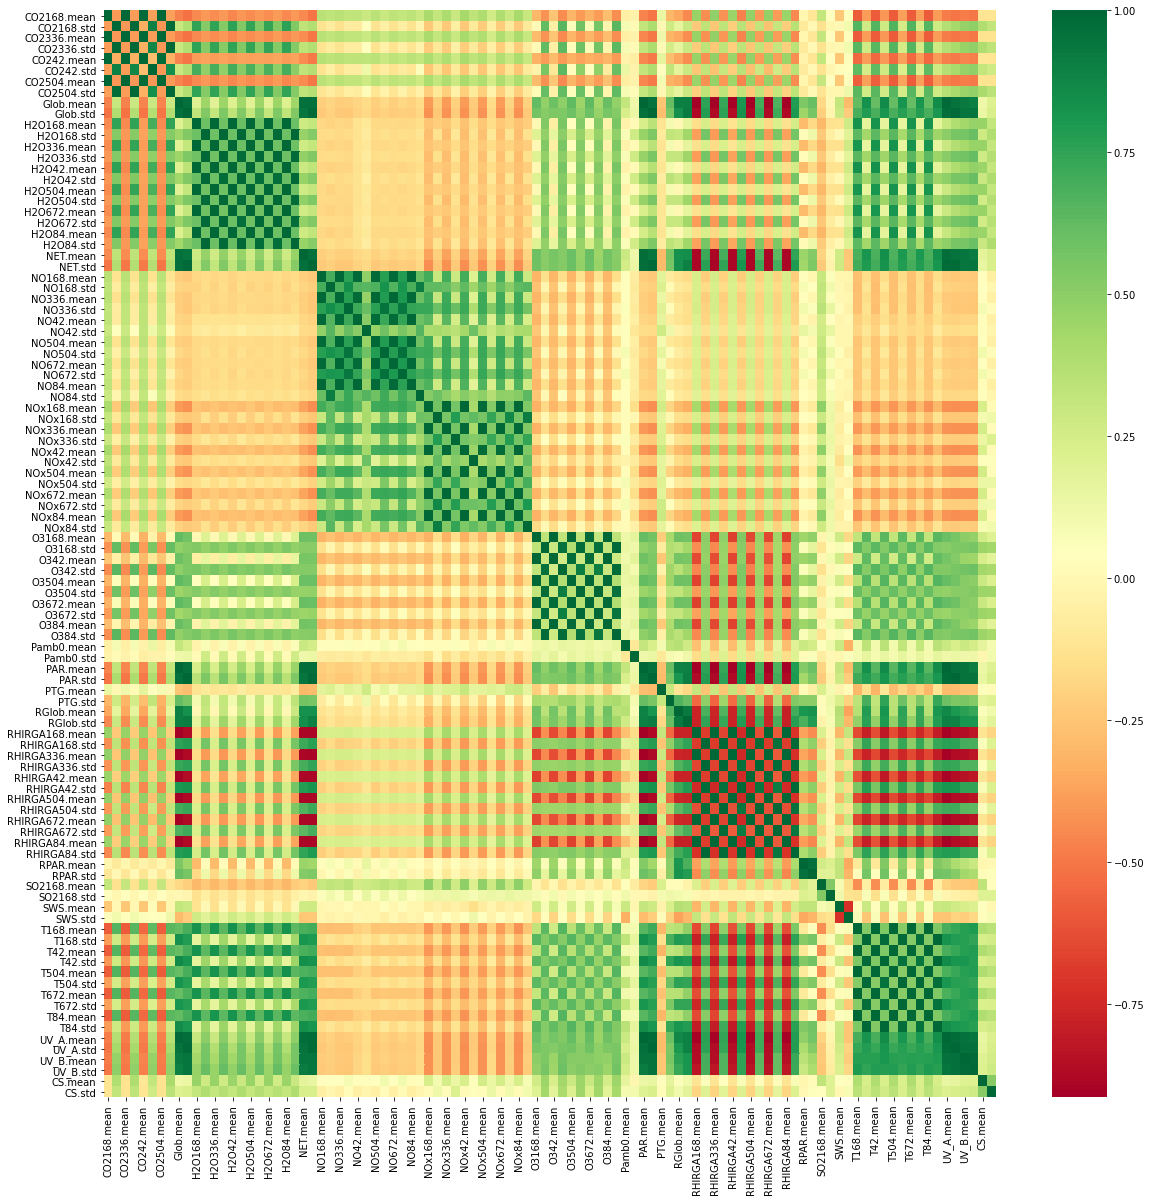

In [684]:
corrmat = npf_train.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
g=sns.heatmap(npf_train[top_corr_features].corr(),annot=False,cmap="RdYlGn")
#plt.savefig('npf_train_correlationmatrix.pdf')  

## Find best features and print accuracy graph

SelectKBest method find correlation between every class and feature. Then it gives these feature correlation scores and sorts result by score. Then we search the number of best features, that gives best training accuracy.

In [685]:
def bestK_and_graph(X_train, y_train, X_val, y_val, X_test, y_test, title):
    len_cols = len(X_train.columns)+1
    acc_train = []
    acc_test = []
    acc_val = []

    for i in range(1, len_cols):
    
        # Train filter with full dataset. Find i number of best col names.
        X_train_0to1 = normalize_0to1(X_train)
        bestFeatureCols = find_n_best_feature(X_train_0to1, y_train, i)
    
        # Filter train, val and test set with bestFeaturesFilter
        X_train_i = X_train[bestFeatureCols]
        X_val_i = X_val[bestFeatureCols]
        X_test_i = X_test[bestFeatureCols]
        
        # Train Gaussian Naive Bayes model
        model = GaussianNB()
        model.fit(X_train_i, y_train)
    
        # Save accurancy to list
        acc_train.append(accuracy_score(y_train, model.predict(X_train_i)))
        acc_test.append(accuracy_score(y_test, model.predict(X_test_i)))
        acc_val.append(accuracy_score(y_val, model.predict(X_val_i)))
    
    # Get max value
    max_val = max(acc_val)
    
    # Loop max values and select largest index with max value
    acc_val_max = 0
    acc_val_max_index = 0
    for i in range(len(acc_val)):
        if acc_val[i] >= acc_val_max:
            acc_val_max = acc_val[i]
            acc_val_max_index = i
    bestK_max = acc_val_max_index+1
    
    # Get the col names that are in bestK
    bestCols = find_n_best_feature(X_train_0to1, y_train, bestK_max)
    
    # Plot the results
    plt.figure(num=None, figsize=(15, 10), dpi=80, facecolor='w', edgecolor='k')
    x = range(1, len_cols)
    plt.plot(x, acc_train, color="black")
    plt.plot(x, acc_test, color="blue")
    plt.plot(x, acc_val, color="green")
    # Vertical line to points with max values
    plt.axvline(bestK_max, color='pink', linestyle='-')
    plt.title(title)
    plt.xlabel('Number of features')
    plt.ylabel('Accurancy')
    plt.legend(["train", "test", "val"], loc ="lower right") 
    plt.show()
    
    return bestCols

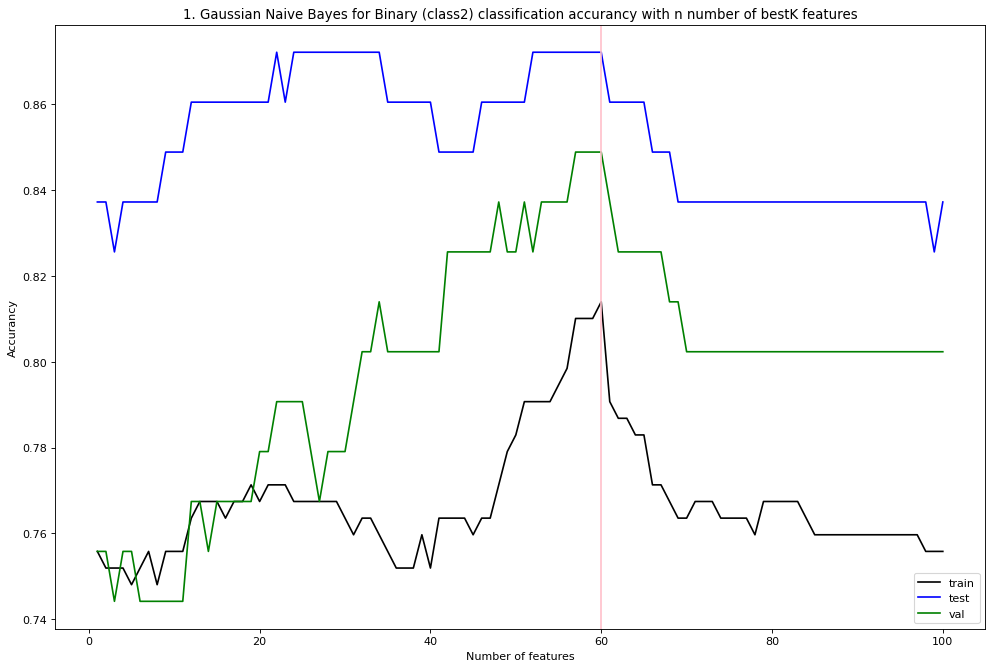

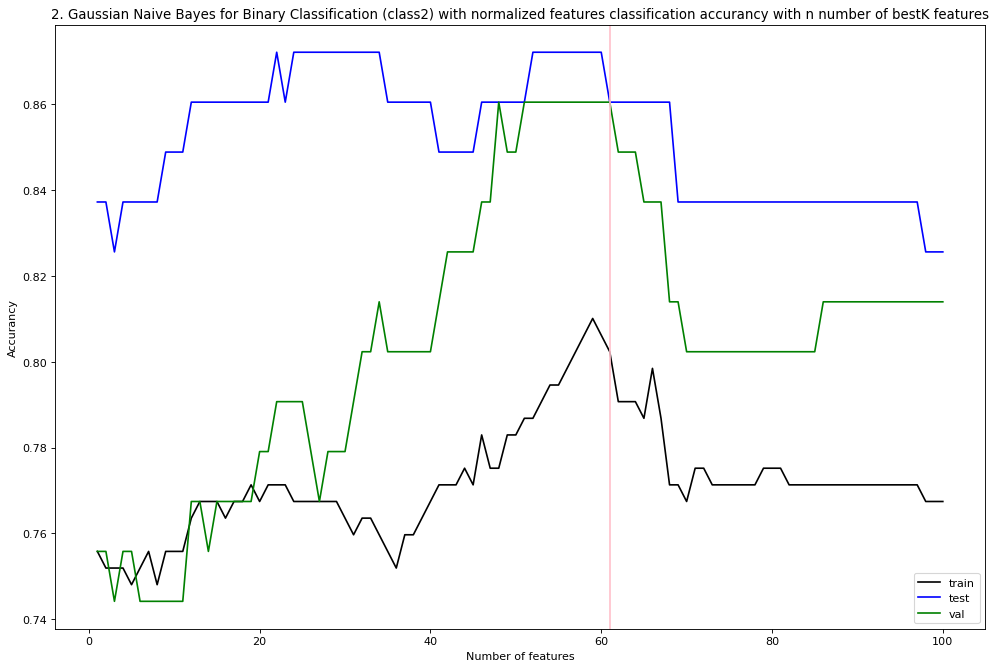

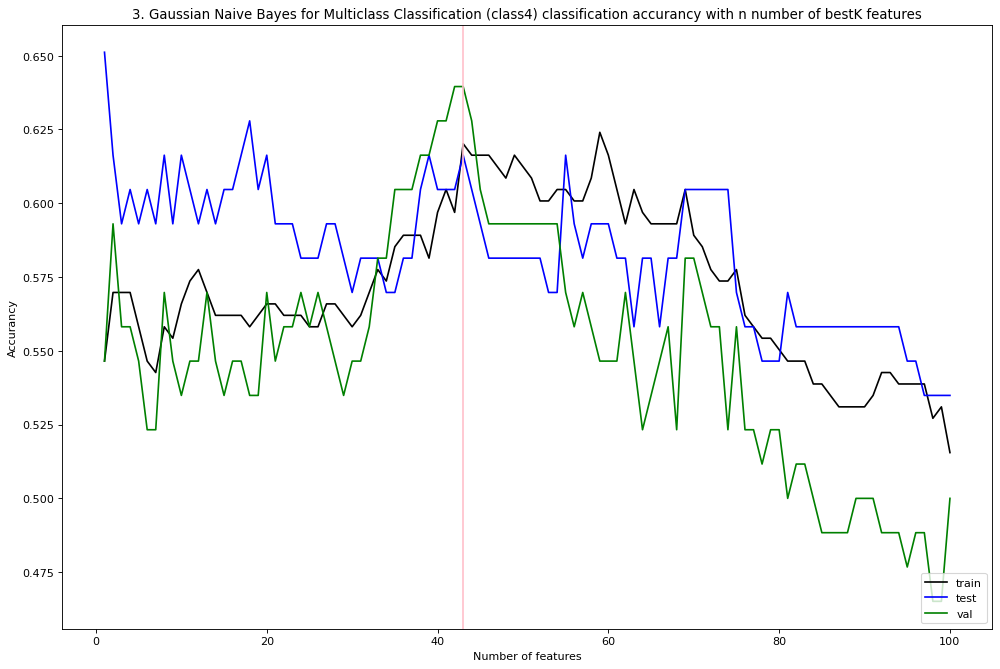

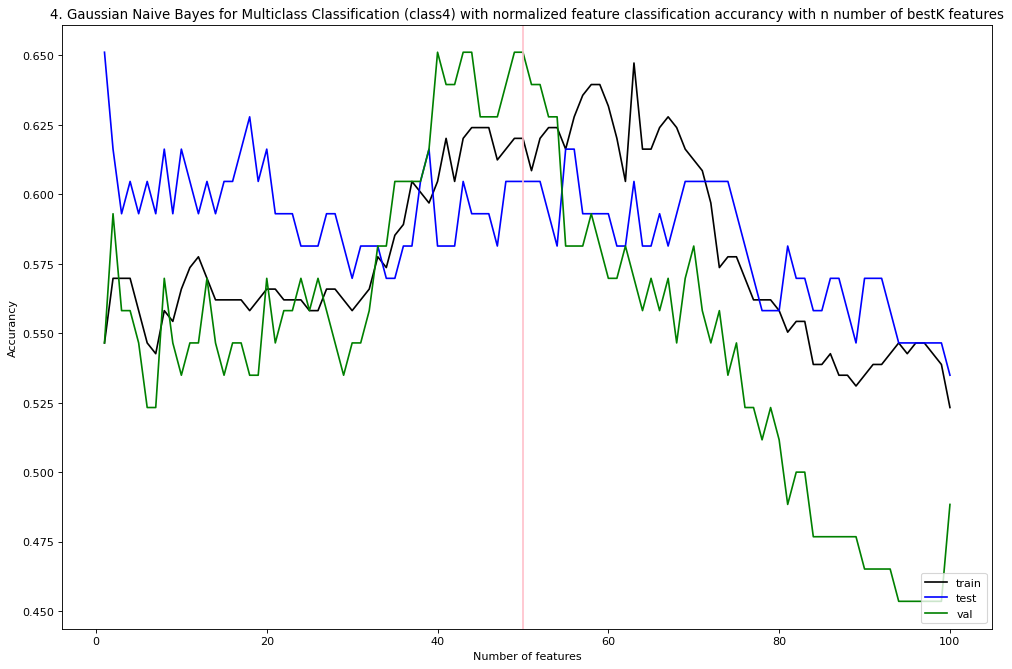

In [686]:
# 1. Gaussian Naive Bayes for Binary Classification (class2)
bestCols1 = bestK_and_graph(X_train, y_train["class2"], X_val, y_val["class2"], X_test, y_test["class2"], "1. Gaussian Naive Bayes for Binary (class2) classification accurancy with n number of bestK features")

# 2. Gaussian Naive Bayes for Binary Classification (class2) with normalized features
bestCols2 = bestK_and_graph(X_train_norm, y_train["class2"], X_val_norm, y_val["class2"], X_test_norm, y_test["class2"], "2. Gaussian Naive Bayes for Binary Classification (class2) with normalized features classification accurancy with n number of bestK features")

# 3. Gaussian Naive Bayes for Multiclass Classification (class4)
bestCols3 = bestK_and_graph(X_train, y_train["class4"], X_val, y_val["class4"], X_test, y_test["class4"], "3. Gaussian Naive Bayes for Multiclass Classification (class4) classification accurancy with n number of bestK features")

# 4. Gaussian Naive Bayes for Multiclass Classification (class4) with normalized feature
bestCols4 = bestK_and_graph(X_train_norm, y_train["class4"], X_val_norm, y_val["class4"], X_test_norm, y_test["class4"], "4. Gaussian Naive Bayes for Multiclass Classification (class4) with normalized feature classification accurancy with n number of bestK features")

## 1. Gaussian Naive Bayes Binary classification (class2)

### Gaussian Naive Bayes Binary accuracy with all features

In [687]:
model = GaussianNB()
model.fit(X_train, y_train["class2"])

print("Gaussian Naive Bayes binary classification")
print("Train set accurancy:", round(accuracy_score(y_train["class2"], model.predict(X_train)),2))
print("Test set accurancy:", round(accuracy_score(y_test["class2"], model.predict(X_test)),2))
print("Validation set accurancy:", round(accuracy_score(y_val["class2"], model.predict(X_val)), 2))

Gaussian Naive Bayes binary classification
Train set accurancy: 0.76
Test set accurancy: 0.84
Validation set accurancy: 0.8


### Gaussian Naive Bayes Binary accuracy with kBest features

In [688]:
X_train_i = X_train[bestCols1]
X_val_i = X_val[bestCols1]
X_test_i = X_test[bestCols1]

model = GaussianNB()
model.fit(X_train_i, y_train["class2"])

print("Gaussian Naive Bayes binary classification with", len(bestCols1), "best features")
print("Train set accurancy:", round(accuracy_score(y_train["class2"], model.predict(X_train_i)),2))
print("Test set accurancy:", round(accuracy_score(y_test["class2"], model.predict(X_test_i)),2))
print("Validation set accurancy:", round(accuracy_score(y_val["class2"], model.predict(X_val_i)), 2))

Gaussian Naive Bayes binary classification with 60 best features
Train set accurancy: 0.81
Test set accurancy: 0.87
Validation set accurancy: 0.85


## 2. Gaussian Naive Bayes Binary classification (class2) normalized features

### Gaussian Naive Bayes Binary accuracy with all normalized features

In [689]:
model = GaussianNB()
model.fit(X_train_norm, y_train["class2"])

print("Gaussian Naive Bayes binary classification normalized features")
print("Train set accurancy:", round(accuracy_score(y_train["class2"], model.predict(X_train_norm)),2))
print("Test set accurancy:", round(accuracy_score(y_test["class2"], model.predict(X_test_norm)),2))
print("Validation set accurancy:", round(accuracy_score(y_val["class2"], model.predict(X_val_norm)), 2))

Gaussian Naive Bayes binary classification normalized features
Train set accurancy: 0.77
Test set accurancy: 0.83
Validation set accurancy: 0.81


### Gaussian Naive Bayes Binary accuracy with all kBest features

In [690]:
X_train_i = X_train_norm[bestCols2]
X_val_i = X_val_norm[bestCols2]
X_test_i = X_test_norm[bestCols2]

model = GaussianNB()
model.fit(X_train_i, y_train["class2"])

print("Gaussian Naive Bayes binary classification with", len(bestCols2), "best normalized features")
print("Train set accurancy:", round(accuracy_score(y_train["class2"], model.predict(X_train_i)),2))
print("Test set accurancy:", round(accuracy_score(y_test["class2"], model.predict(X_test_i)),2))
print("Validation set accurancy:", round(accuracy_score(y_val["class2"], model.predict(X_val_i)), 2))

Gaussian Naive Bayes binary classification with 61 best normalized features
Train set accurancy: 0.8
Test set accurancy: 0.86
Validation set accurancy: 0.86


## 3. Gaussian Naive Bayes Multiclass classification (class4)

### Gaussian Naive Bayes Multiclass accuracy with all features

In [691]:
model = GaussianNB()
model.fit(X_train, y_train["class4"])

print("Gaussian Naive Bayes Multiclass classification")
print("Train set accurancy:", round(accuracy_score(y_train["class4"], model.predict(X_train)),2))
print("Test set accurancy:", round(accuracy_score(y_test["class4"], model.predict(X_test)),2))
print("Validation set accurancy:", round(accuracy_score(y_val["class4"], model.predict(X_val)), 2))

Gaussian Naive Bayes Multiclass classification
Train set accurancy: 0.52
Test set accurancy: 0.53
Validation set accurancy: 0.5


### Gaussian Naive Bayes Multiclass accuracy with kBest features

In [692]:
X_train_i = X_train[bestCols3]
X_val_i = X_val[bestCols3]
X_test_i = X_test[bestCols3]

model = GaussianNB()
model.fit(X_train_i, y_train["class4"])

print("Gaussian Naive Bayes Multiclass classification with", len(bestCols3), "best features")
print("Train set accurancy:", round(accuracy_score(y_train["class4"], model.predict(X_train_i)),2))
print("Test set accurancy:", round(accuracy_score(y_test["class4"], model.predict(X_test_i)),2))
print("Validation set accurancy:", round(accuracy_score(y_val["class4"], model.predict(X_val_i)), 2))

Gaussian Naive Bayes Multiclass classification with 43 best features
Train set accurancy: 0.62
Test set accurancy: 0.62
Validation set accurancy: 0.64


## 4. Gaussian Naive Bayes Multiclass classification (class4) normalized features

### Gaussian Naive Bayes Multiclass accuracy with all normalized features

In [693]:
model = GaussianNB()
model.fit(X_train_norm, y_train["class4"])

print("Gaussian Naive Bayes Multiclass classification normalized features")
print("Train set accurancy:", round(accuracy_score(y_train["class4"], model.predict(X_train_norm)),2))
print("Test set accurancy:", round(accuracy_score(y_test["class4"], model.predict(X_test_norm)),2))
print("Validation set accurancy:", round(accuracy_score(y_val["class4"], model.predict(X_val_norm)), 2))

Gaussian Naive Bayes Multiclass classification normalized features
Train set accurancy: 0.52
Test set accurancy: 0.53
Validation set accurancy: 0.49


### Gaussian Naive Bayes Multiclass accuracy with kBest normalized features

In [694]:
X_train_i = X_train_norm[bestCols4]
X_val_i = X_val_norm[bestCols4]
X_test_i = X_test_norm[bestCols4]

model = GaussianNB()
model.fit(X_train_i, y_train["class4"])

print("Gaussian Naive Bayes Multiclass classification with", len(bestCols4), "best normalized features")
print("Train set accurancy:", round(accuracy_score(y_train["class4"], model.predict(X_train_i)),2))
print("Test set accurancy:", round(accuracy_score(y_test["class4"], model.predict(X_test_i)),2))
print("Validation set accurancy:", round(accuracy_score(y_val["class4"], model.predict(X_val_i)), 2))

Gaussian Naive Bayes Multiclass classification with 50 best normalized features
Train set accurancy: 0.62
Test set accurancy: 0.6
Validation set accurancy: 0.65


## Train the best binary and multiclass models and make class prediction for npf_test_hidden

Next we observe the result for binary prediction and to multiclass prediction. 

For binary prediction we got best results with not normalized and 60 kBest features. 

The results were:

Gaussian Naive Bayes binary classification with 60 best features <br>
Train set accurancy: 0.81 <br>
Test set accurancy: 0.87 <br>
Validation set accurancy: 0.85 <br>

For multiclass prediction we got best results with not normalized and 43 kBest features. 

The results were:

Gaussian Naive Bayes Multiclass classification with 43 best features <br>
Train set accurancy: 0.62 <br>
Test set accurancy: 0.62 <br> 
Validation set accurancy: 0.64 <br>

Next we will make predicions to npf_test_hidden with these models.

### Train Gaussian Naive Bayes binary classification model with 60 kBest features

In [695]:
X_trainval_i = X_trainval[bestCols1]
X_test_i = X_test[bestCols1]
npf_test_hidden_i = npf_test_hidden[bestCols1]

model = GaussianNB()
model.fit(X_trainval_i, y_trainval["class2"])

print("Gaussian Naive Bayes binary classification with", len(bestCols1), "best features")
print("Train+validation set accurancy:", round(accuracy_score(y_trainval["class2"], model.predict(X_trainval_i)),2))
print("Test set accurancy:", round(accuracy_score(y_test["class2"], model.predict(X_test_i)),2))

Gaussian Naive Bayes binary classification with 60 best features
Train+validation set accurancy: 0.82
Test set accurancy: 0.87


### Make binary prediction for X_test

In [696]:
# Get prediction classes
test_bin_class = pd.DataFrame(model.predict(X_test_i))

# Get prediction probabilities
test_bin_prob = pd.DataFrame(model.predict_proba(X_test_i))

# Merge classes and probabilities
test_bin_pred = pd.merge(test_bin_class, test_bin_prob, left_index=True, right_index=True)

# Reset index of true labels to mach prediction index
y_bin = y_test.copy()
y_bin = y_bin.reset_index()

# Add true labels
test_bin_pred = pd.merge(test_bin_pred, y_bin["class2"], left_index=True, right_index=True)

# Rename columns
test_bin_pred.columns = ["NB_pred_class", "NB_p(event)", "NB_p(nonevent)", "NB_truelabel"]

# Check accuracy
ncorrect = test_bin_pred[test_bin_pred["NB_pred_class"] == test_bin_pred["NB_truelabel"]].shape[0]
print("Test set accuracy:", ncorrect/y_test.shape[0])
print("Should be:", round(accuracy_score(y_test["class2"], model.predict(X_test_i)),2))

# Save results
test_bin_pred.to_csv("prediction_results/NB_test_bin.csv", index=False)

# Show dataframe
test_bin_pred

Test set accuracy: 0.872093023255814
Should be: 0.87


,NB_pred_class,NB_p(event),NB_p(nonevent),NB_truelabel
0,nonevent,3.911760e-33,1.000000e+00,nonevent
1,nonevent,5.927607e-12,1.000000e+00,nonevent
2,event,9.999437e-01,5.629272e-05,event
3,nonevent,3.048545e-24,1.000000e+00,nonevent
4,event,1.000000e+00,1.800085e-10,nonevent
...,...,...,...,...
81,event,1.000000e+00,3.073092e-11,nonevent
82,event,1.000000e+00,1.243588e-13,nonevent
83,event,1.000000e+00,6.348066e-16,event
84,nonevent,5.530072e-09,1.000000e+00,nonevent


### Make binary prediction for npf_test_hidden

In [697]:
# Get prediction classes
bin_class = pd.DataFrame(model.predict(npf_test_hidden_i))

# Get prediction probabilities
bin_prob = pd.DataFrame(model.predict_proba(npf_test_hidden_i))

# Merge classes and probabilities
NB_bin_pred = pd.merge(bin_class, bin_prob, left_index=True, right_index=True)

# Rename columns
NB_bin_pred.columns = ["NB_pred_class", "NB_p(event)", "NB_p(nonevent)"]

# Save results
NB_bin_pred.to_csv("prediction_results/NB_bin.csv", index=False)

# Show dataframe
NB_bin_pred

,NB_pred_class,NB_p(event),NB_p(nonevent)
0,event,9.999998e-01,1.726299e-07
1,nonevent,6.396269e-17,1.000000e+00
2,nonevent,3.046145e-34,1.000000e+00
3,event,1.000000e+00,1.131420e-31
4,nonevent,4.063615e-15,1.000000e+00
...,...,...,...
960,event,1.000000e+00,2.160401e-15
961,event,1.000000e+00,1.064034e-14
962,nonevent,1.942802e-21,1.000000e+00
963,nonevent,8.338768e-10,1.000000e+00


### Train Gaussian Naive Bayes multiclass classification model with 43 kBest features

In [698]:
X_trainval_i = X_trainval[bestCols3]
X_test_i = X_test[bestCols3]
npf_test_hidden_i = npf_test_hidden[bestCols3]

model = GaussianNB()
model.fit(X_trainval_i, y_trainval["class4"])

print("Gaussian Naive Bayes multiclass classification with", len(bestCols3), "best features")
print("Train+validation set accurancy:", round(accuracy_score(y_trainval["class4"], model.predict(X_trainval_i)),2))
print("Test set accurancy:", round(accuracy_score(y_test["class4"], model.predict(X_test_i)),2))

Gaussian Naive Bayes multiclass classification with 43 best features
Train+validation set accurancy: 0.6
Test set accurancy: 0.66


### Make multiclass prediction for X_test

In [699]:
# Get prediction classes
test_bin_class = pd.DataFrame(model.predict(X_test_i))

# Get prediction probabilities
test_bin_prob = pd.DataFrame(model.predict_proba(X_test_i))

# Merge classes and probabilities
test_bin_pred = pd.merge(test_bin_class, test_bin_prob, left_index=True, right_index=True)

# Reset index of true labels to mach prediction index
y_bin = y_test.copy()
y_bin = y_bin.reset_index()

# Add true labels
test_bin_pred = pd.merge(test_bin_pred, y_bin["class4"], left_index=True, right_index=True)

# Rename columns
test_bin_pred.columns = ["NB_pred_class", "NB_p(II)", "NB_p(Ia)","NB_p(Ib)","NB_p(nonevent)", "NB_truelabel"]

# Check accuracy
ncorrect = test_bin_pred[test_bin_pred["NB_pred_class"] == test_bin_pred["NB_truelabel"]].shape[0]
print("Test set accuracy:", ncorrect/y_test.shape[0])
print("Should be:", round(accuracy_score(y_test["class4"], model.predict(X_test_i)),2))

# Save results
test_bin_pred.to_csv("prediction_results/NB_test_multi.csv", index=False)

# Show dataframe
test_bin_pred

Test set accuracy: 0.6627906976744186
Should be: 0.66


,NB_pred_class,NB_p(II),NB_p(Ia),NB_p(Ib),NB_p(nonevent),NB_truelabel
0,nonevent,9.137620e-29,0.000000e+00,2.928694e-47,1.000000e+00,nonevent
1,nonevent,1.362902e-02,0.000000e+00,4.729173e-08,9.863709e-01,nonevent
2,II,9.910437e-01,1.417204e-142,8.704057e-03,2.521999e-04,Ib
3,nonevent,8.572165e-23,0.000000e+00,2.616634e-37,1.000000e+00,nonevent
4,II,7.152608e-01,4.502350e-15,2.847392e-01,3.003522e-15,nonevent
...,...,...,...,...,...,...
81,II,9.193140e-01,5.457505e-07,8.068545e-02,8.818600e-11,nonevent
82,II,9.494042e-01,3.926034e-231,5.059579e-02,2.643854e-12,nonevent
83,Ib,1.831036e-05,1.986767e-04,9.997830e-01,7.858143e-17,Ib
84,nonevent,8.278050e-10,1.174208e-04,5.313351e-13,9.998826e-01,nonevent


### Make multiclass prediction for npf_test_hidden

In [700]:
# Get prediction classes
multi_class = pd.DataFrame(model.predict(npf_test_hidden_i))

# Get prediction probabilities
multi_prob = pd.DataFrame(model.predict_proba(npf_test_hidden_i))

# Merge classes and probabilities
NB_multi_pred = pd.merge(multi_class, multi_prob, left_index=True, right_index=True)

# Rename columns
NB_multi_pred.columns = ["NB_pred_class", "NB_p(II)", "NB_p(Ia)","NB_p(Ib)","NB_p(nonevent)"]

# Save results
NB_multi_pred.to_csv("prediction_results/NB_multi.csv", index=False)

# Show dataframe
NB_multi_pred

,NB_pred_class,NB_p(II),NB_p(Ia),NB_p(Ib),NB_p(nonevent)
0,II,9.316851e-01,3.958374e-66,6.831488e-02,1.306913e-09
1,nonevent,1.151875e-20,2.325390e-07,1.644030e-31,9.999998e-01
2,nonevent,8.620204e-33,0.000000e+00,2.903969e-51,1.000000e+00
3,Ib,2.665384e-02,3.907124e-04,9.729554e-01,1.458482e-28
4,nonevent,2.133194e-16,8.024377e-15,4.058921e-17,1.000000e+00
...,...,...,...,...,...
960,Ib,1.681069e-01,3.687284e-05,8.318563e-01,2.173895e-14
961,Ib,3.116180e-01,1.684938e-164,6.883820e-01,4.190588e-15
962,nonevent,9.863550e-21,1.074880e-08,1.288751e-29,1.000000e+00
963,nonevent,8.508702e-10,8.503681e-05,3.714659e-12,9.999150e-01
